# Import dependencies

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Read the data

In [2]:
df = pd.read_csv('data/bus_007_data.csv')
df

ts  ActualEngPercentTorque  EngSpeed  \
0       2022-12-01 03:22:22                    21.0   610.500   
1       2022-12-01 03:22:23                    21.0   612.625   
2       2022-12-01 03:22:24                    21.0   605.875   
3       2022-12-01 03:22:25                    20.0   609.875   
4       2022-12-01 03:22:26                    11.0   658.500   
...                     ...                     ...       ...   
319304  2022-12-12 23:24:35                     7.0     0.000   
319305  2022-12-12 23:24:36                   130.0  8191.875   
319306  2022-12-12 23:24:45                     NaN       NaN   
319307  2022-12-12 23:25:12                     NaN       NaN   
319308  2022-12-12 23:54:30                   130.0  8191.875   

        FrontAxleLeftWheelSpeed  AcceleratorPedalPosition1  \
0                      3.359375                       19.2   
1                      3.929688                       21.2   
2                      4.414062                        5.2   
3                      4.757812                        0.0   
4                      4.156250                        0.0   
...                         ...                        ...   
319304                      NaN                        0.0   
319305                      NaN                        0.0   
319306                      NaN                        NaN   
319307                      NaN                        0.0   
319308                 0.000000                        0.0   

        EnginePercentLoadAtCurrentSpeed  WheelBasedVehicleSpeed  \
0                                  33.0                3.238281   
1                                  33.0                3.914062   
2                                  35.0                4.496094   
3                                  33.0                4.972656   
4                                   0.0                4.324219   
...                                 ...                     ...   
319304                              0.0                     NaN   
319305                              0.0                     NaN   
319306                              NaN                     NaN   
319307                            255.0                     NaN   
319308                            255.0                     NaN   

        EngInstantaneousFuelEconomy  HighResolutionEngTotalFuelUsed  \
0                         16.392578                       88108.841   
1                         25.376953                             NaN   
2                         25.685547                       88108.844   
3                         25.697266                       88108.846   
4                         26.904297                             NaN   
...                             ...                             ...   
319304                          NaN                             NaN   
319305                          NaN                             NaN   
319306                          NaN                             NaN   
319307                          NaN                             NaN   
319308                          NaN                             NaN   

        HighResolutionTripDistance  
0                              NaN  
1                     1.067825e+06  
2                     1.067825e+06  
3                              NaN  
4                     1.067830e+06  
...                            ...  
319304                         NaN  
319305                         NaN  
319306                2.147484e+10  
319307                         NaN  
319308                         NaN  

[319309 rows x 10 columns]

# Basic checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319309 entries, 0 to 319308
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ts                               319309 non-null  object 
 1   ActualEngPercentTorque           304381 non-null  float64
 2   EngSpeed                         304381 non-null  float64
 3   FrontAxleLeftWheelSpeed          215826 non-null  float64
 4   AcceleratorPedalPosition1        265905 non-null  float64
 5   EnginePercentLoadAtCurrentSpeed  265905 non-null  float64
 6   WheelBasedVehicleSpeed           225423 non-null  float64
 7   EngInstantaneousFuelEconomy      103926 non-null  float64
 8   HighResolutionEngTotalFuelUsed   54936 non-null   float64
 9   HighResolutionTripDistance       128015 non-null  float64
dtypes: float64(9), object(1)
memory usage: 24.4+ MB


In [4]:
df.describe().transpose()

count          mean           std  \
ActualEngPercentTorque           304381.0  2.146239e+01  2.491719e+01   
EngSpeed                         304381.0  8.718398e+02  3.057728e+02   
FrontAxleLeftWheelSpeed          215826.0  2.460021e+01  1.453512e+01   
AcceleratorPedalPosition1        265905.0  2.776918e+01  3.468889e+01   
EnginePercentLoadAtCurrentSpeed  265905.0  3.184919e+01  3.816923e+01   
WheelBasedVehicleSpeed           225423.0  2.390620e+01  1.667199e+01   
EngInstantaneousFuelEconomy      103926.0  1.924444e+01  2.685060e+01   
HighResolutionEngTotalFuelUsed    54936.0  8.869178e+04  3.108503e+04   
HighResolutionTripDistance       128015.0  1.768100e+07  5.999475e+08   

                                       min            25%           50%  \
ActualEngPercentTorque               0.000       4.000000  9.000000e+00   
EngSpeed                             0.000     608.250000  8.396250e+02   
FrontAxleLeftWheelSpeed              0.000      13.398438  2.497656e+01   
AcceleratorPedalPosition1            0.000       0.000000  8.800000e+00   
EnginePercentLoadAtCurrentSpeed      0.000       0.000000  6.000000e+00   
WheelBasedVehicleSpeed               0.000      11.636719  2.419141e+01   
EngInstantaneousFuelEconomy          0.000       4.177734  8.021484e+00   
HighResolutionEngTotalFuelUsed   88108.841   88341.615750  8.846698e+04   
HighResolutionTripDistance           0.000  402070.000000  1.080785e+06   

                                          75%           max  
ActualEngPercentTorque           3.400000e+01  1.300000e+02  
EngSpeed                         1.055500e+03  8.191875e+03  
FrontAxleLeftWheelSpeed          3.499219e+01  2.559961e+02  
AcceleratorPedalPosition1        5.000000e+01  1.020000e+02  
EnginePercentLoadAtCurrentSpeed  6.900000e+01  2.550000e+02  
WheelBasedVehicleSpeed           3.481250e+01  2.559961e+02  
EngInstantaneousFuelEconomy      2.013818e+01  1.279980e+02  
HighResolutionEngTotalFuelUsed   8.858677e+04  4.294967e+06  
HighResolutionTripDistance       1.368422e+06  2.147484e+10

# Remove the outliers
About 99.72% of the whole data lies within three standard deviations (<3σ).
To get 3σ, we need to take the scale ~= 1.7

In [5]:
Q1 = df.quantile(0.25) # lower percentile
Q3 = df.quantile(0.75) # upper percentile

# Inter-Quartile Range
IQR = Q3 - Q1

# Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier
lower_bound = Q1 - 1.7 * IQR
upper_bound = Q3 + 1.7 * IQR

df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

/var/folders/y9/2t_72qpj4zx5vgcy788__f6m0000gn/T/ipykernel_25546/1516659289.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


# Check data without outliers

In [6]:
df.describe().transpose()

count           mean            std  \
ActualEngPercentTorque           281785.0      19.589503      21.958268   
EngSpeed                         281785.0     860.286388     270.356234   
FrontAxleLeftWheelSpeed          195687.0      24.449855      14.174771   
AcceleratorPedalPosition1        244488.0      26.009813      32.895257   
EnginePercentLoadAtCurrentSpeed  244488.0      30.454480      36.880959   
WheelBasedVehicleSpeed           203460.0      23.633408      14.811981   
EngInstantaneousFuelEconomy       85147.0      11.018079      10.008128   
HighResolutionEngTotalFuelUsed    48601.0   88462.619155     157.386528   
HighResolutionTripDistance       115675.0  909701.325654  529389.278062   

                                       min            25%           50%  \
ActualEngPercentTorque               0.000       4.000000  9.000000e+00   
EngSpeed                             0.000     608.250000  8.341250e+02   
FrontAxleLeftWheelSpeed              0.000      13.789062  2.475781e+01   
AcceleratorPedalPosition1            0.000       0.000000  6.800000e+00   
EnginePercentLoadAtCurrentSpeed      0.000       0.000000  6.000000e+00   
WheelBasedVehicleSpeed               0.000      12.222656  2.404297e+01   
EngInstantaneousFuelEconomy          0.000       4.305664  7.279297e+00   
HighResolutionEngTotalFuelUsed   88108.841   88345.544000  8.846847e+04   
HighResolutionTripDistance           0.000  406810.000000  1.082540e+06   

                                          75%           max  
ActualEngPercentTorque           3.100000e+01  8.500000e+01  
EngSpeed                         1.043000e+03  1.815500e+03  
FrontAxleLeftWheelSpeed          3.465234e+01  7.169531e+01  
AcceleratorPedalPosition1        4.640000e+01  1.000000e+02  
EnginePercentLoadAtCurrentSpeed  6.500000e+01  1.000000e+02  
WheelBasedVehicleSpeed           3.442969e+01  7.304688e+01  
EngInstantaneousFuelEconomy      1.437695e+01  4.726758e+01  
HighResolutionEngTotalFuelUsed   8.858700e+04  8.874892e+04  
HighResolutionTripDistance       1.363748e+06  1.726780e+06

# Check for missing data

In [7]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in df.columns:
    # count number of rows with missing values
    n_miss = df[column].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_df = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_df

N_Missing [-]  Percentage [%]
ts                                           0             0.0
ActualEngPercentTorque                   14481             5.0
EngSpeed                                 14481             5.0
FrontAxleLeftWheelSpeed                 100579            34.0
AcceleratorPedalPosition1                51778            17.0
EnginePercentLoadAtCurrentSpeed          51778            17.0
WheelBasedVehicleSpeed                   92806            31.0
EngInstantaneousFuelEconomy             211119            71.0
HighResolutionEngTotalFuelUsed          247665            84.0
HighResolutionTripDistance              180591            61.0

The last two columns: HighResolutionEngTotalFuelUsed and HighResolutionTripDistance can be potentially dropped.

# EDA

### Column correlation

<AxesSubplot: >

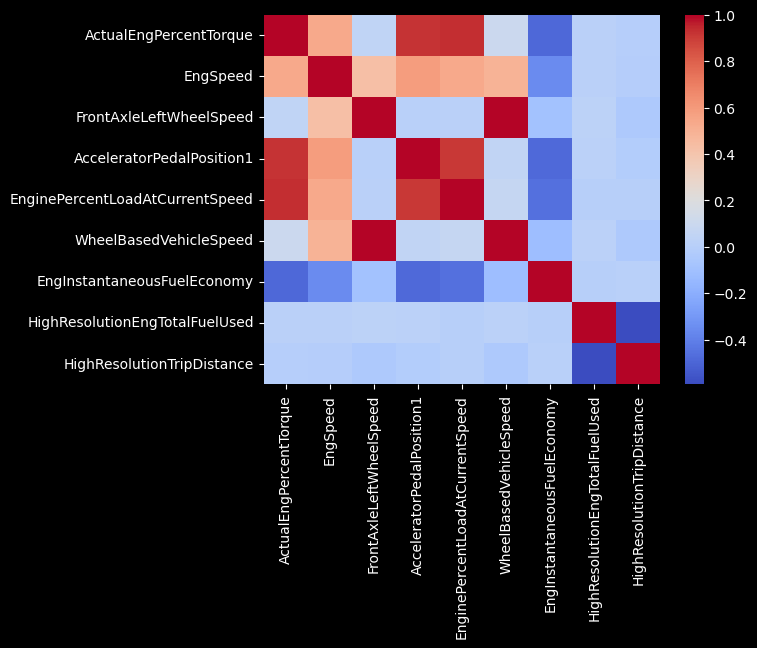

In [8]:
plt.style.use("dark_background")
sns.heatmap(df.corr(), cmap='coolwarm')

### Pairwise relationships in a dataset

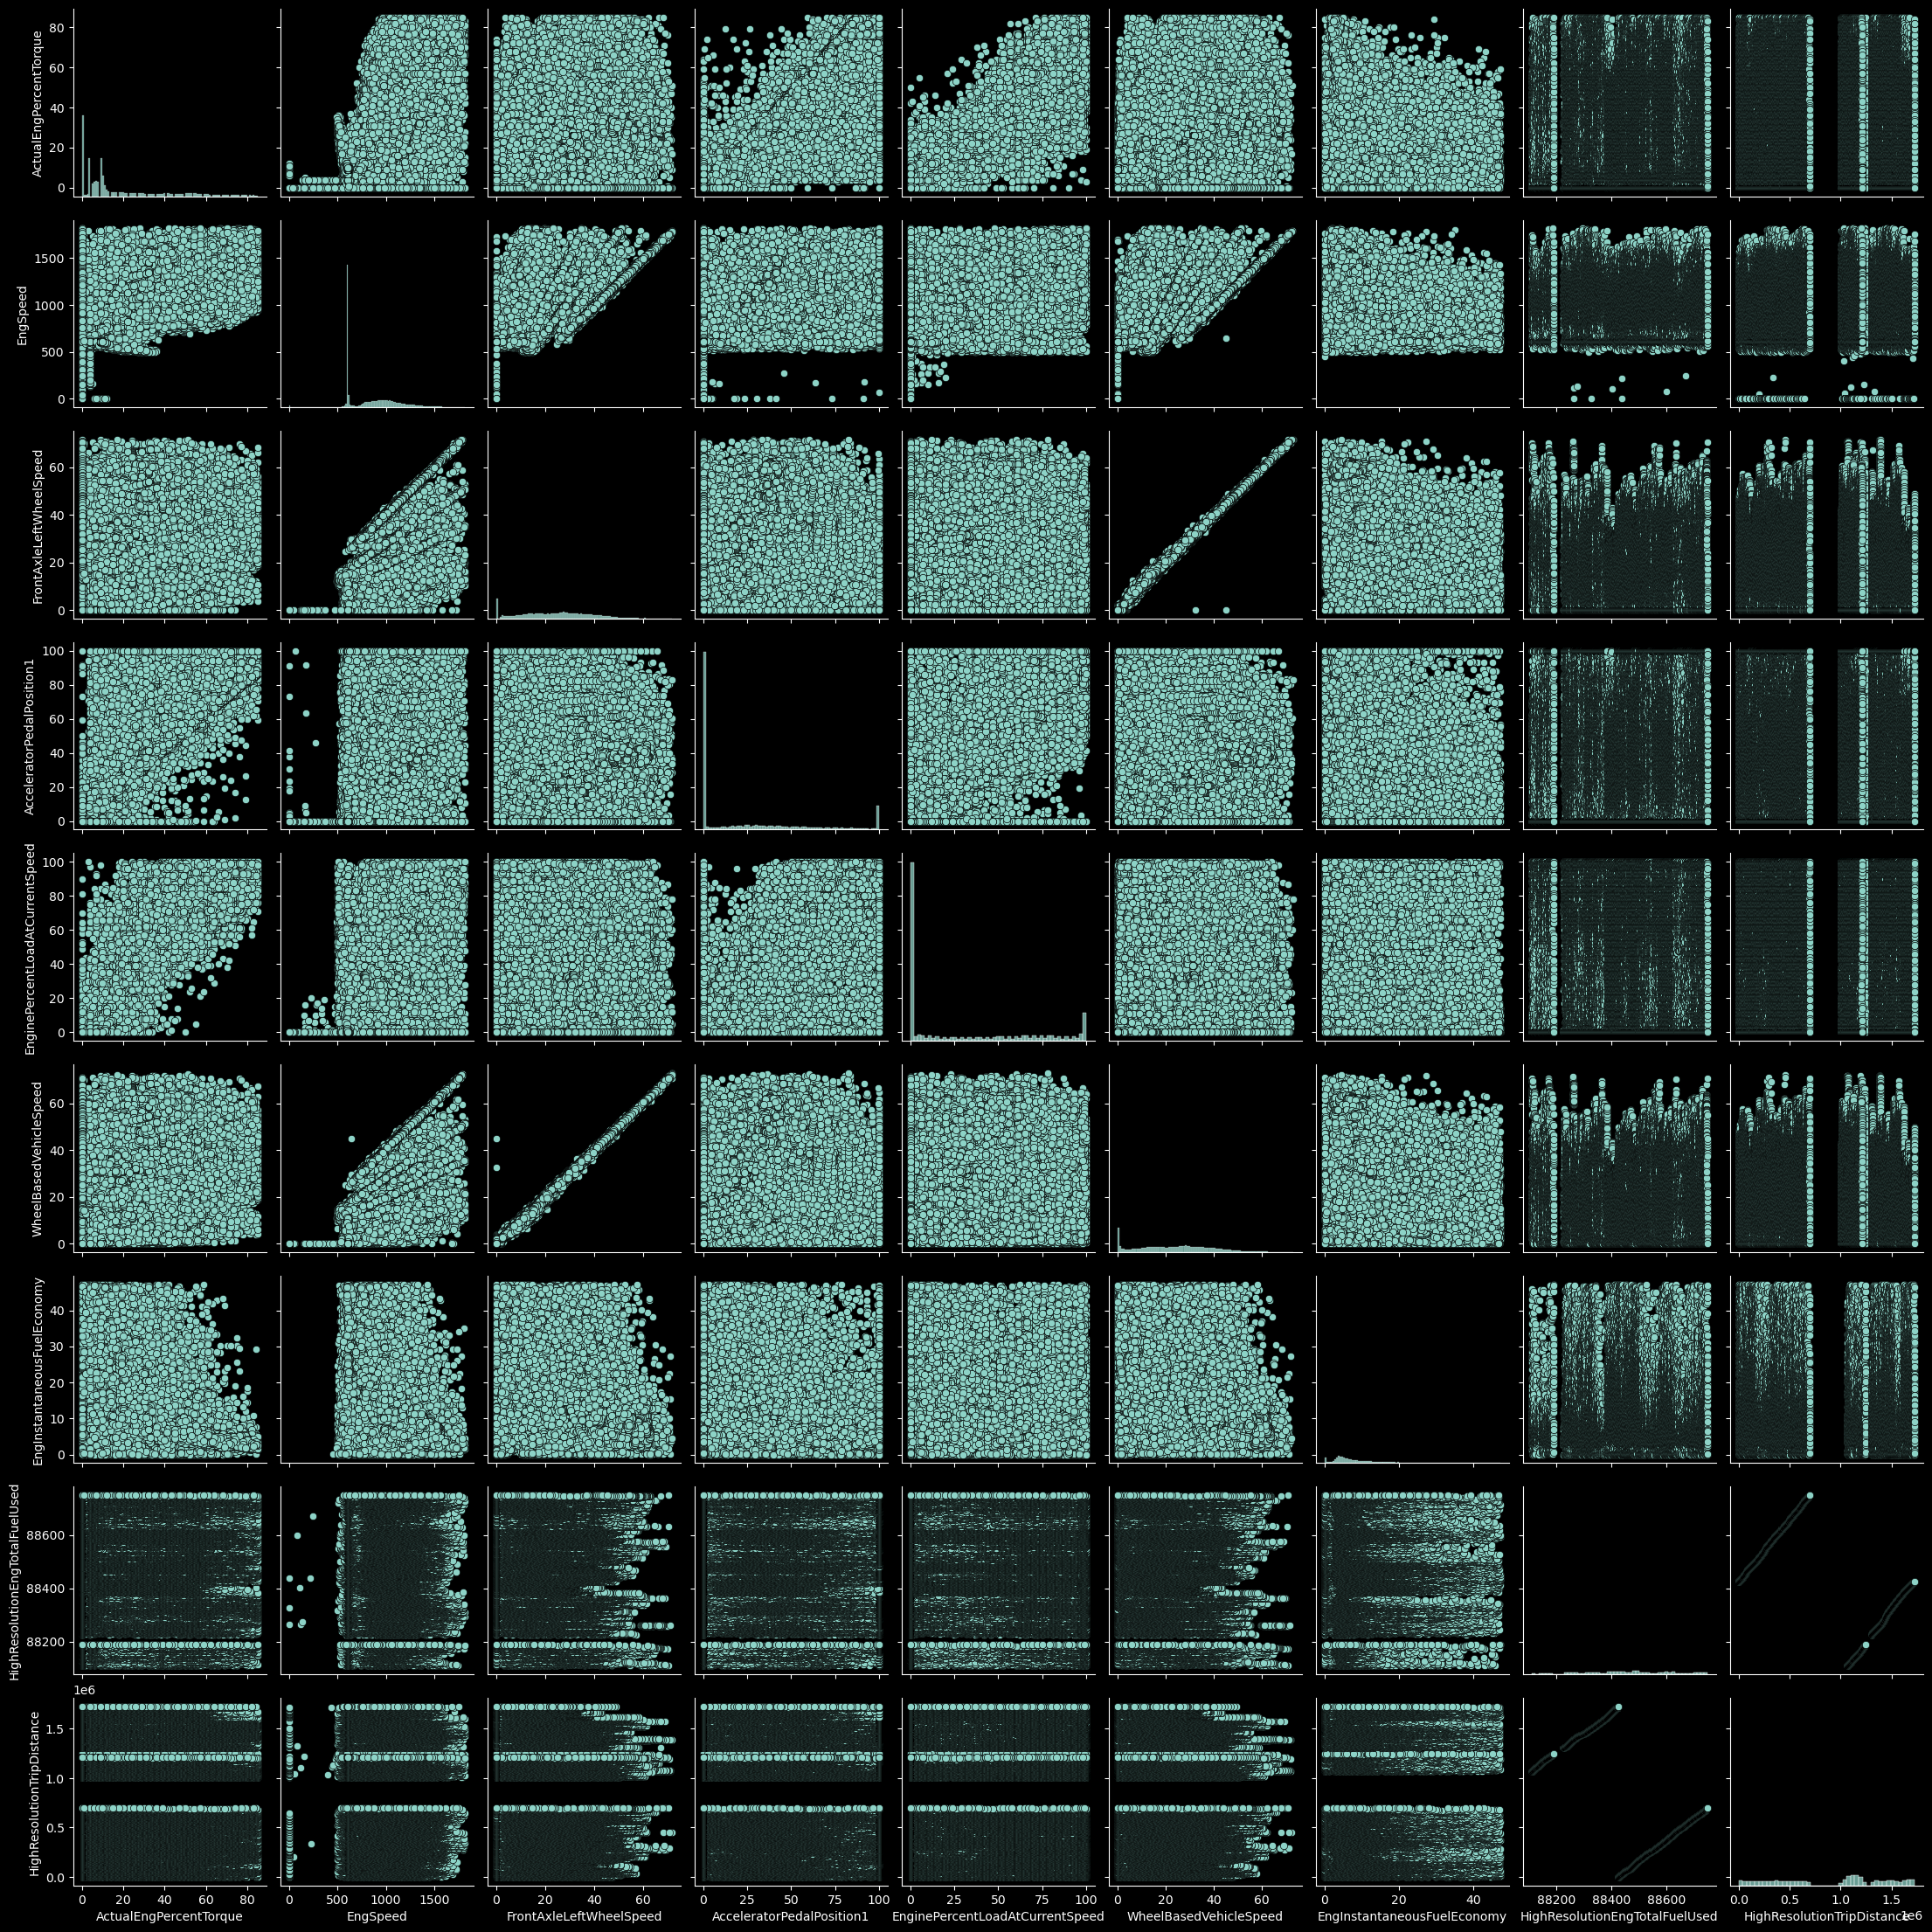

In [9]:
sns.pairplot(df, plot_kws=dict(edgecolor="black"))

### ActualEngPercentTorque [%]
The calculated output torque of the engine.

<AxesSubplot: xlabel='ActualEngPercentTorque', ylabel='Density'>

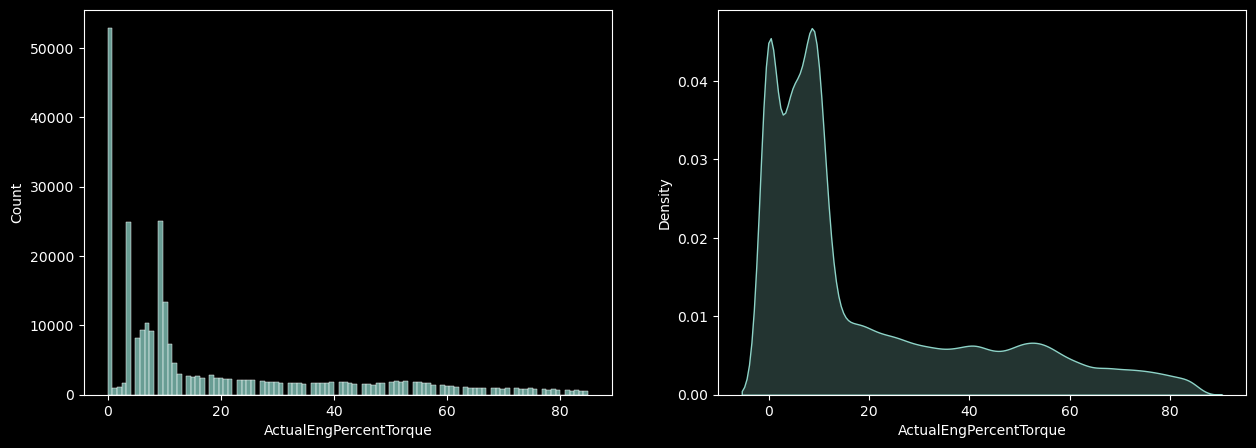

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.ActualEngPercentTorque, ax=ax[0])
sns.kdeplot(df.ActualEngPercentTorque, fill=True, ax=ax[1])

<AxesSubplot: >

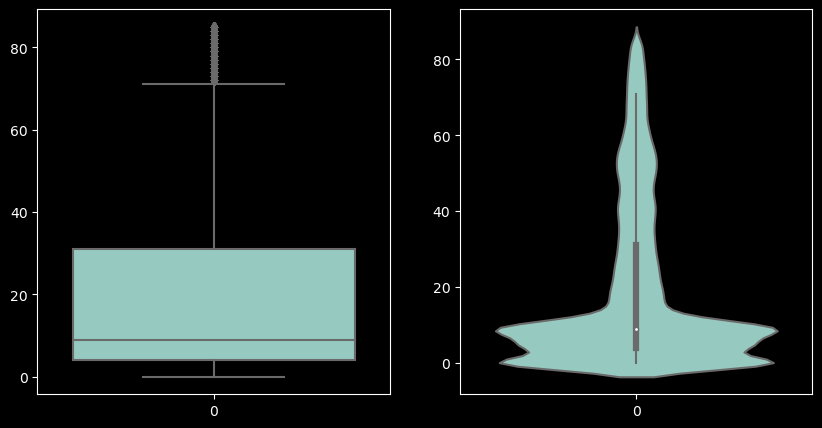

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.ActualEngPercentTorque, ax=ax[0])
sns.violinplot(df.ActualEngPercentTorque, ax=ax[1])

### EngSpeed [RPM]
Actual engine speed which is calculated over a minimum crankshaft angle of 720 degrees divided by the number of cylinders.

<AxesSubplot: xlabel='EngSpeed', ylabel='Density'>

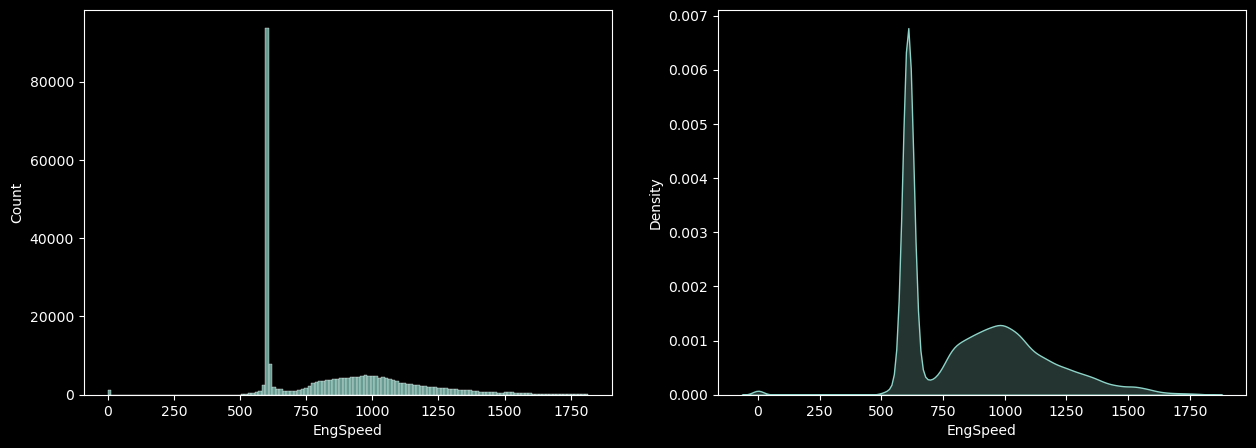

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.EngSpeed, ax=ax[0])
sns.kdeplot(df.EngSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

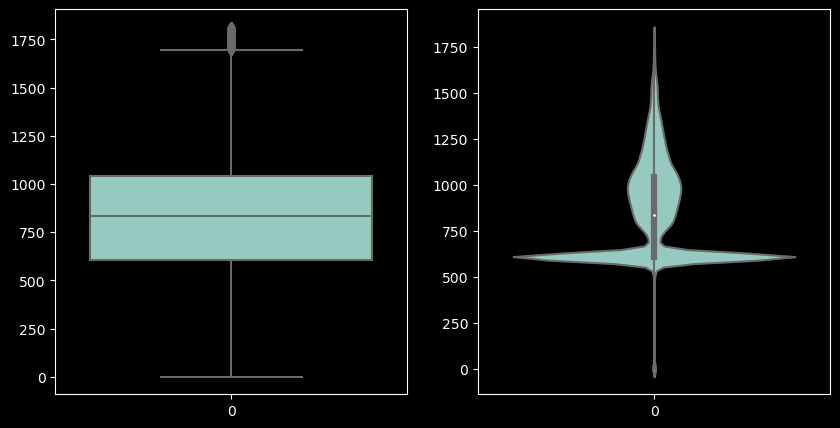

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.EngSpeed, ax=ax[0])
sns.violinplot(df.EngSpeed, ax=ax[1])

### FrontAxleLeftWheelSpeed [km/h]
High resolution measurement of the speed of the left wheel on the front axle.

<AxesSubplot: xlabel='FrontAxleLeftWheelSpeed', ylabel='Density'>

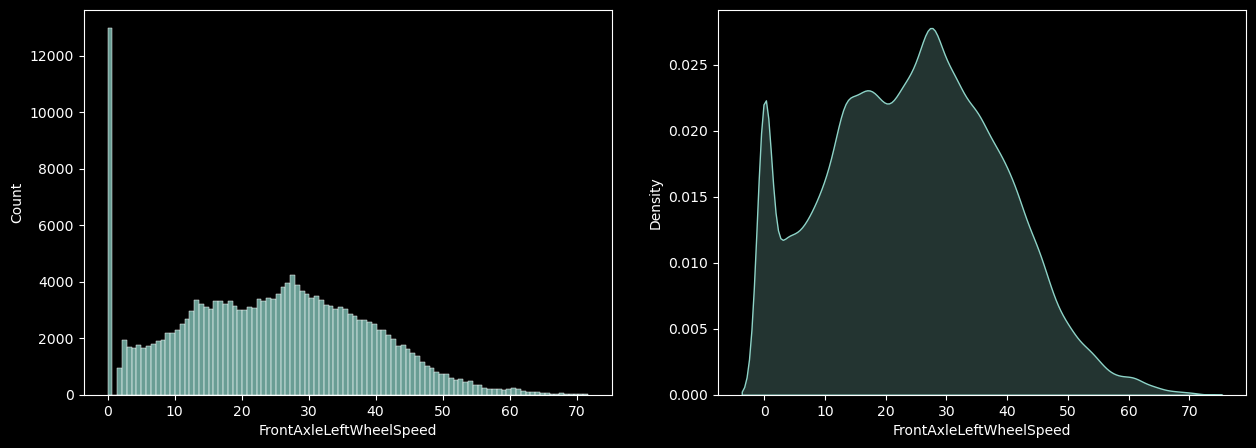

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.FrontAxleLeftWheelSpeed, ax=ax[0])
sns.kdeplot(df.FrontAxleLeftWheelSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

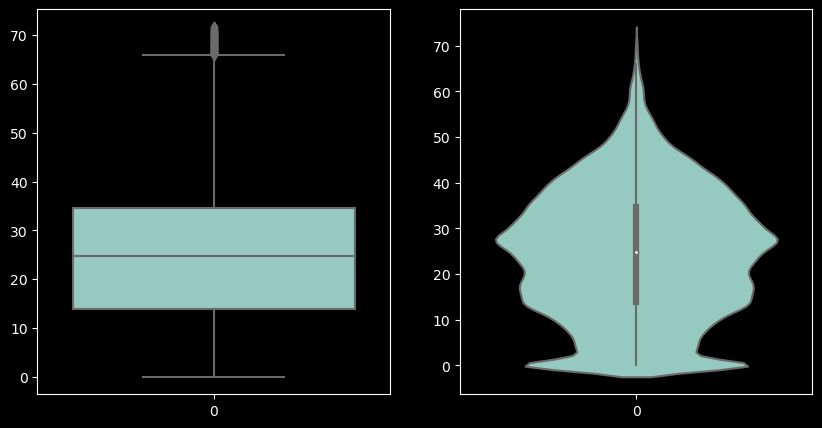

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.FrontAxleLeftWheelSpeed, ax=ax[0])
sns.violinplot(df.FrontAxleLeftWheelSpeed, ax=ax[1])

### AcceleratorPedalPosition1 [%]
Parameter intended for the primary accelerator control in an application.


<AxesSubplot: xlabel='AcceleratorPedalPosition1', ylabel='Density'>

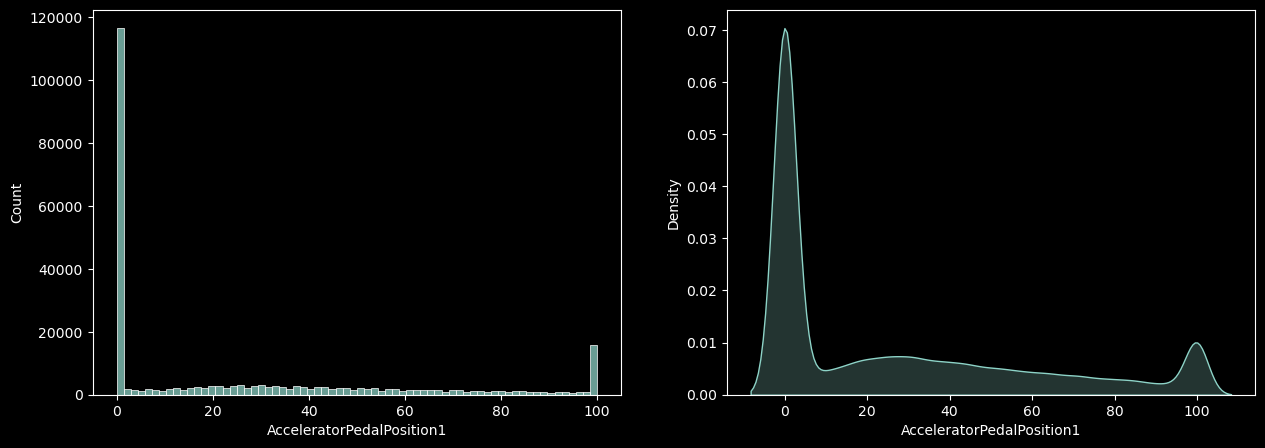

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.AcceleratorPedalPosition1, ax=ax[0])
sns.kdeplot(df.AcceleratorPedalPosition1, fill=True, ax=ax[1])

<AxesSubplot: >

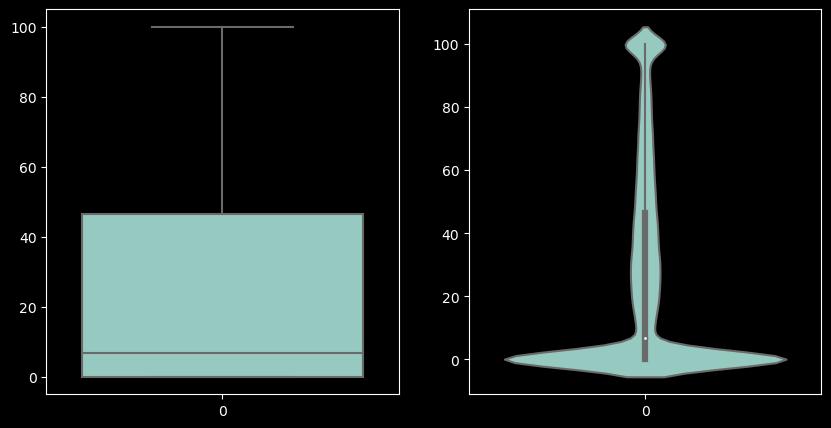

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.AcceleratorPedalPosition1, ax=ax[0])
sns.violinplot(df.AcceleratorPedalPosition1, ax=ax[1])

### EnginePercentLoadAtCurrentSpeed [%]
The ratio of actual engine percent torque (indicated) to maximum indicated torque available at the current engine speed, clipped to zero torque during engine braking.

<AxesSubplot: xlabel='EnginePercentLoadAtCurrentSpeed', ylabel='Density'>

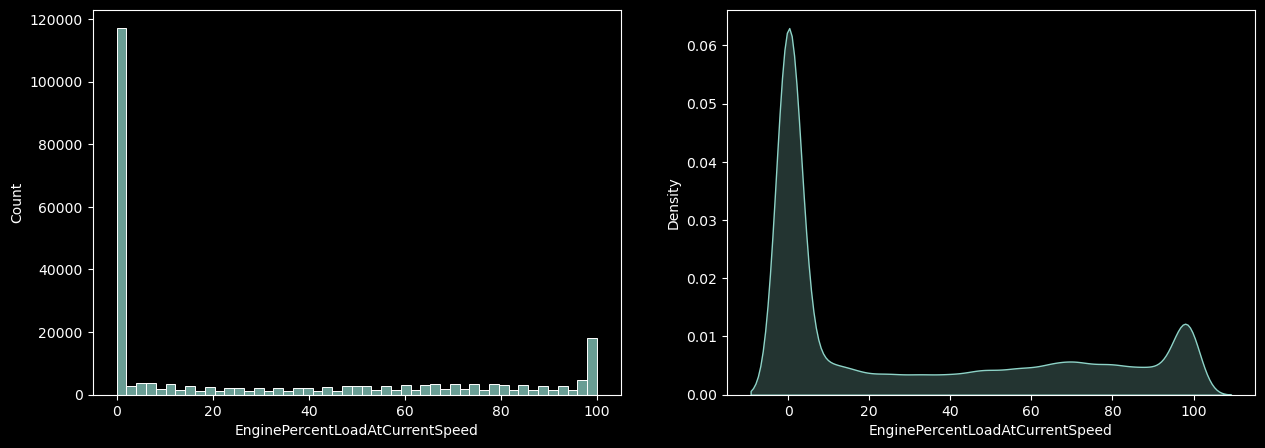

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.EnginePercentLoadAtCurrentSpeed, ax=ax[0])
sns.kdeplot(df.EnginePercentLoadAtCurrentSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

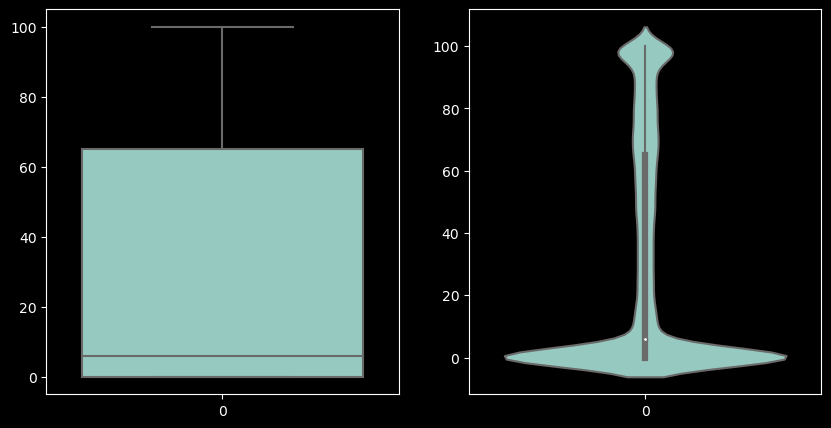

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.EnginePercentLoadAtCurrentSpeed, ax=ax[0])
sns.violinplot(df.EnginePercentLoadAtCurrentSpeed, ax=ax[1])

### WheelBasedVehicleSpeed [km/h]
Speed of the vehicle as calculated from wheel or tailshaft speed.


<AxesSubplot: xlabel='WheelBasedVehicleSpeed', ylabel='Density'>

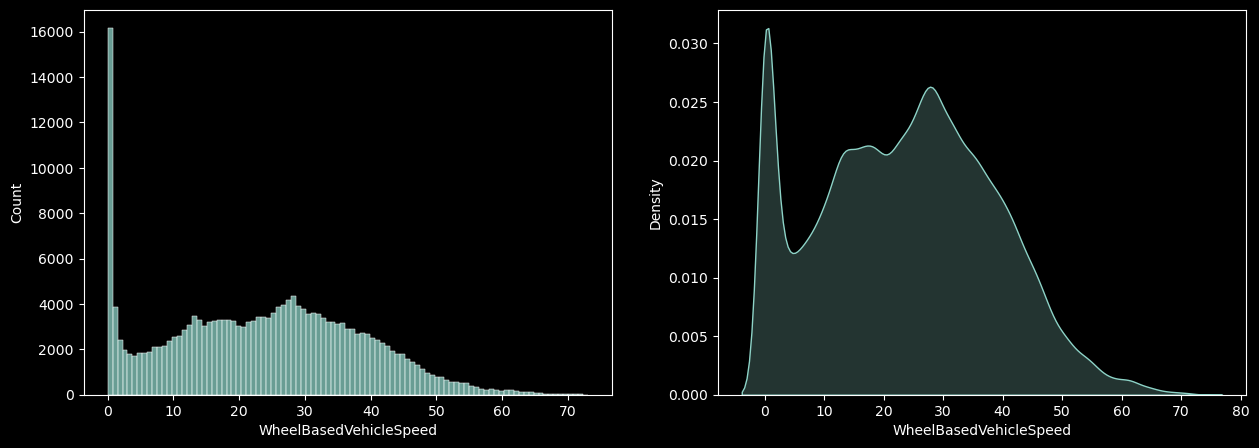

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.WheelBasedVehicleSpeed, ax=ax[0])
sns.kdeplot(df.WheelBasedVehicleSpeed, fill=True, ax=ax[1])

<AxesSubplot: >

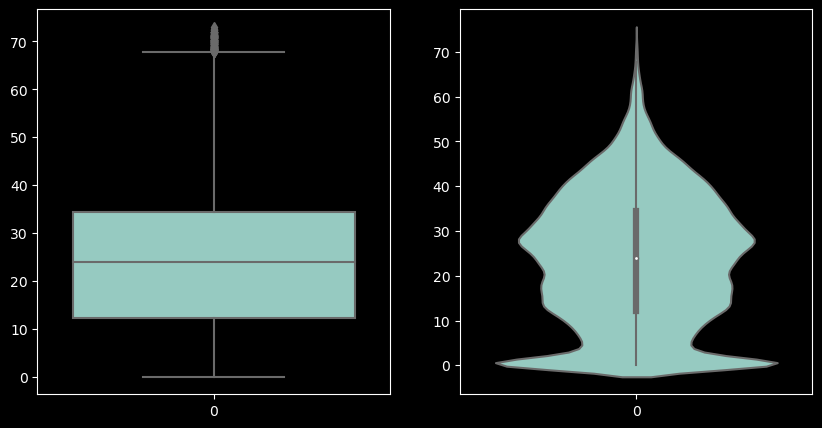

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.WheelBasedVehicleSpeed, ax=ax[0])
sns.violinplot(df.WheelBasedVehicleSpeed, ax=ax[1])

### HighResolutionTripDistance [m] 
Distance traveled during all or part of a journey.


<AxesSubplot: xlabel='HighResolutionTripDistance', ylabel='Density'>

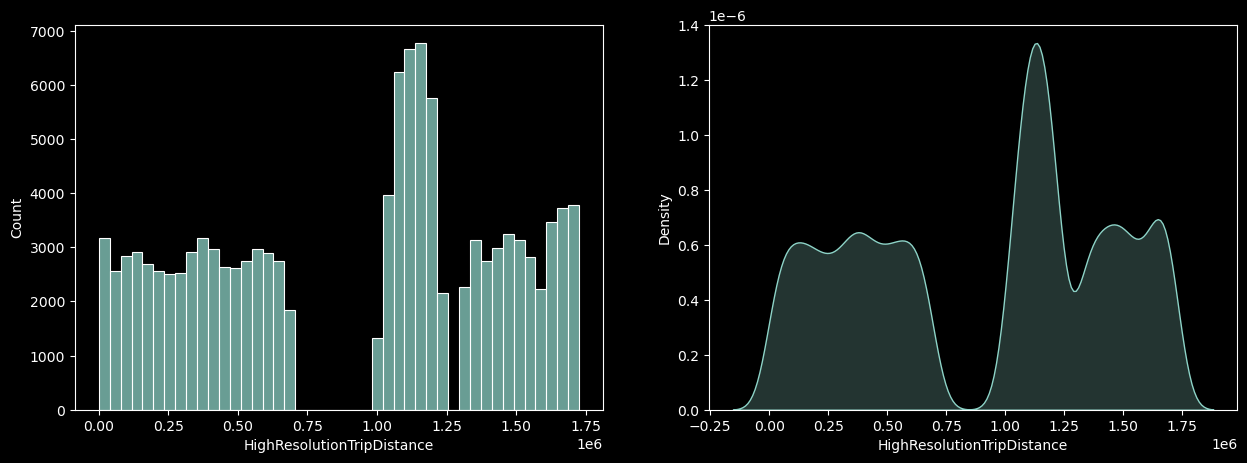

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.HighResolutionTripDistance, ax=ax[0])
sns.kdeplot(df.HighResolutionTripDistance, fill=True, ax=ax[1])

<AxesSubplot: >

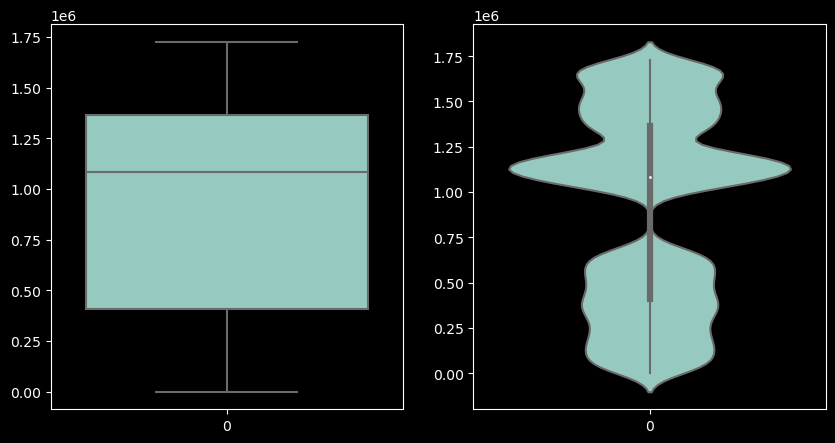

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.HighResolutionTripDistance, ax=ax[0])
sns.violinplot(df.HighResolutionTripDistance, ax=ax[1])

### EngInstantaneousFuelEconomy [km/L]
Current fuel economy at current vehicle velocity.



<AxesSubplot: xlabel='EngInstantaneousFuelEconomy', ylabel='Density'>

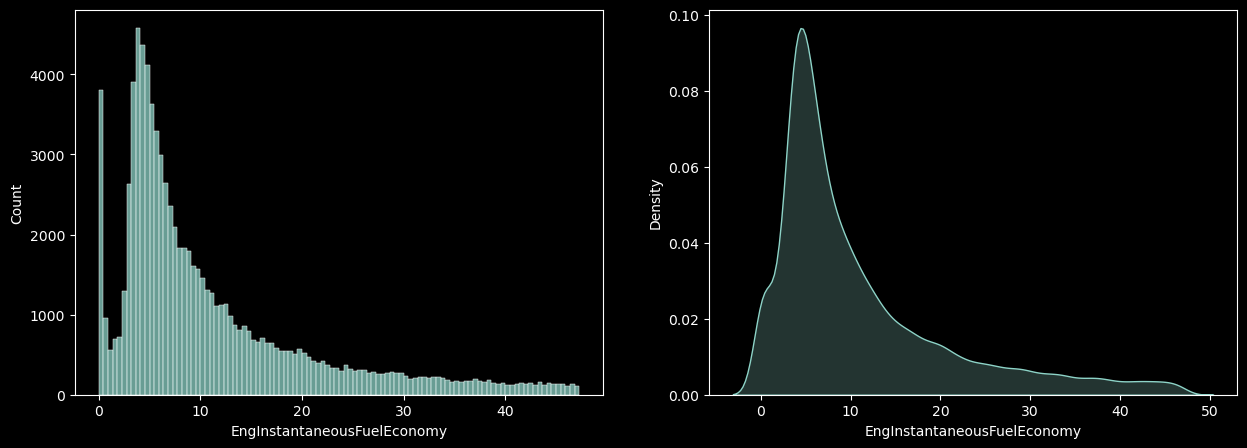

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.EngInstantaneousFuelEconomy, ax=ax[0])
sns.kdeplot(df.EngInstantaneousFuelEconomy, fill=True, ax=ax[1])

<AxesSubplot: >

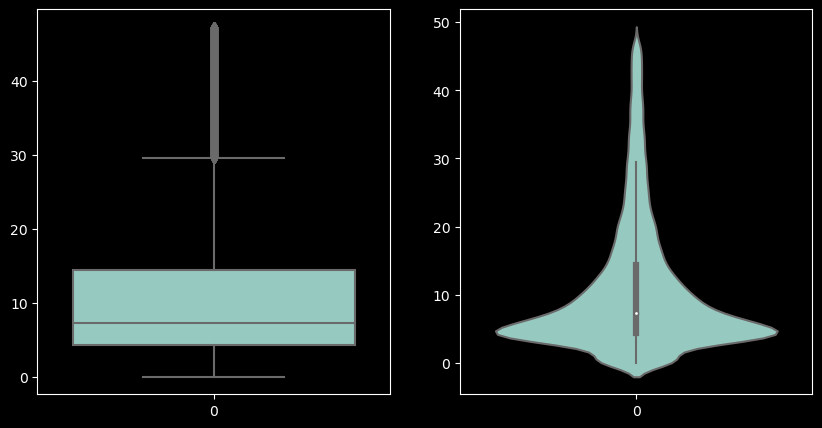

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.EngInstantaneousFuelEconomy, ax=ax[0])
sns.violinplot(df.EngInstantaneousFuelEconomy, ax=ax[1])

### HighResolutionEngTotalFuelUsed [l] 
Accumulated amount of fuel used during vehicle operation. 

<AxesSubplot: xlabel='HighResolutionEngTotalFuelUsed', ylabel='Density'>

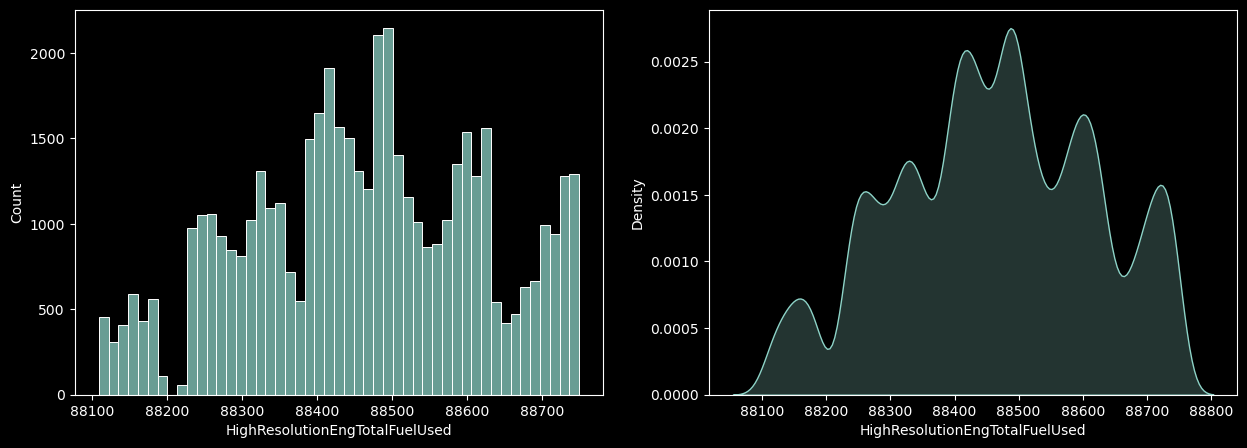

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df.HighResolutionEngTotalFuelUsed, ax=ax[0])
sns.kdeplot(df.HighResolutionEngTotalFuelUsed, fill=True, ax=ax[1])

<AxesSubplot: >

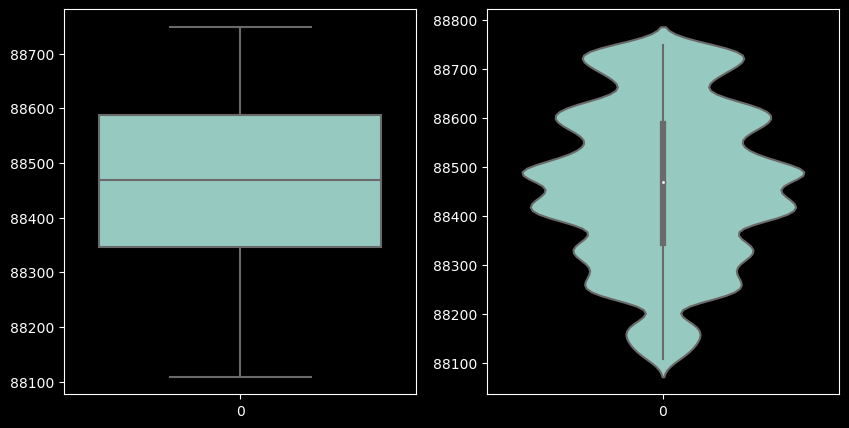

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df.HighResolutionEngTotalFuelUsed, ax=ax[0])
sns.violinplot(df.HighResolutionEngTotalFuelUsed, ax=ax[1])

# Training and Target data split

#### Rows for the last, unknown day 12.12.2022

In [43]:
unlabelled = df.loc[df['ts'] >= '2022-12-12 00:00:00']
unlabelled

ts  ActualEngPercentTorque  EngSpeed  \
272067  2022-12-12 04:52:14                    43.0   947.125   
272068  2022-12-12 04:52:15                    43.0   962.625   
272069  2022-12-12 04:52:16                    46.0  1012.875   
272070  2022-12-12 04:52:17                    50.0  1123.875   
272071  2022-12-12 04:52:18                    34.0   940.375   
...                     ...                     ...       ...   
319298  2022-12-12 23:24:28                    10.0   608.250   
319299  2022-12-12 23:24:29                    10.0   607.625   
319301  2022-12-12 23:24:31                     0.0   475.000   
319303  2022-12-12 23:24:33                     0.0    39.125   
319304  2022-12-12 23:24:35                     7.0     0.000   

        FrontAxleLeftWheelSpeed  AcceleratorPedalPosition1  \
272067                 6.093750                       44.4   
272068                 6.750000                       44.8   
272069                 7.867188                       47.6   
272070                 8.984375                       53.6   
272071                 9.890625                       43.2   
...                         ...                        ...   
319298                      NaN                        NaN   
319299                      NaN                        0.0   
319301                      NaN                        NaN   
319303                      NaN                        0.0   
319304                      NaN                        0.0   

        EnginePercentLoadAtCurrentSpeed  WheelBasedVehicleSpeed  \
272067                             71.0                6.253906   
272068                             70.0                6.957031   
272069                             71.0                8.156250   
272070                             79.0                9.574219   
272071                             46.0               10.117188   
...                                 ...                     ...   
319298                              NaN                     NaN   
319299                              0.0                     NaN   
319301                              NaN                     NaN   
319303                              0.0                     NaN   
319304                              0.0                     NaN   

        EngInstantaneousFuelEconomy  HighResolutionEngTotalFuelUsed  \
272067                          NaN                             NaN   
272068                          NaN                             NaN   
272069                          NaN                             NaN   
272070                          NaN                             NaN   
272071                          NaN                             NaN   
...                             ...                             ...   
319298                          NaN                             NaN   
319299                          NaN                             NaN   
319301                          NaN                             NaN   
319303                          NaN                             NaN   
319304                          NaN                             NaN   

        HighResolutionTripDistance  
272067                   1007160.0  
272068                         NaN  
272069                   1007165.0  
272070                         NaN  
272071                   1007170.0  
...                            ...  
319298                         NaN  
319299                         NaN  
319301                         NaN  
319303                         NaN  
319304                         NaN  

[45507 rows x 10 columns]

In [44]:
unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45507 entries, 272067 to 319304
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ts                               45507 non-null  object 
 1   ActualEngPercentTorque           44213 non-null  float64
 2   EngSpeed                         44213 non-null  float64
 3   FrontAxleLeftWheelSpeed          26787 non-null  float64
 4   AcceleratorPedalPosition1        34602 non-null  float64
 5   EnginePercentLoadAtCurrentSpeed  34602 non-null  float64
 6   WheelBasedVehicleSpeed           28031 non-null  float64
 7   EngInstantaneousFuelEconomy      0 non-null      float64
 8   HighResolutionEngTotalFuelUsed   0 non-null      float64
 9   HighResolutionTripDistance       19544 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.8+ MB


Indeed the "EngInstantaneousFuelEconomy" and "HighResolutionEngTotalFuelUsed" are missing.

#### Missing data re-check - Target

In [45]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in unlabelled.columns:
    # count number of rows with missing values
    n_miss = unlabelled[column].isnull().sum()
    perc = n_miss / unlabelled.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_unlabelled = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_unlabelled

N_Missing [-]  Percentage [%]
ts                                           0             0.0
ActualEngPercentTorque                    1294             3.0
EngSpeed                                  1294             3.0
FrontAxleLeftWheelSpeed                  18720            41.0
AcceleratorPedalPosition1                10905            24.0
EnginePercentLoadAtCurrentSpeed          10905            24.0
WheelBasedVehicleSpeed                   17476            38.0
EngInstantaneousFuelEconomy              45507           100.0
HighResolutionEngTotalFuelUsed           45507           100.0
HighResolutionTripDistance               25963            57.0

#### Rows for the days when all the sensors were connected - we can use them as reference for training

In [46]:
labelled = df.loc[df['ts'] < '2022-12-12 00:00:00']
labelled

ts  ActualEngPercentTorque  EngSpeed  \
0       2022-12-01 03:22:22                    21.0   610.500   
1       2022-12-01 03:22:23                    21.0   612.625   
2       2022-12-01 03:22:24                    21.0   605.875   
3       2022-12-01 03:22:25                    20.0   609.875   
4       2022-12-01 03:22:26                    11.0   658.500   
...                     ...                     ...       ...   
272055  2022-12-05 19:46:34                     NaN       NaN   
272056  2022-12-05 19:46:35                     NaN       NaN   
272060  2022-12-05 19:46:41                     NaN       NaN   
272063  2022-12-05 19:47:26                     NaN       NaN   
272066  2022-12-05 19:50:52                     NaN       NaN   

        FrontAxleLeftWheelSpeed  AcceleratorPedalPosition1  \
0                      3.359375                       19.2   
1                      3.929688                       21.2   
2                      4.414062                        5.2   
3                      4.757812                        0.0   
4                      4.156250                        0.0   
...                         ...                        ...   
272055                      NaN                        0.0   
272056                 0.000000                        NaN   
272060                      NaN                        NaN   
272063                 0.000000                        NaN   
272066                 0.000000                        NaN   

        EnginePercentLoadAtCurrentSpeed  WheelBasedVehicleSpeed  \
0                                  33.0                3.238281   
1                                  33.0                3.914062   
2                                  35.0                4.496094   
3                                  33.0                4.972656   
4                                   0.0                4.324219   
...                                 ...                     ...   
272055                              0.0                     NaN   
272056                              NaN                     NaN   
272060                              NaN                     NaN   
272063                              NaN                     NaN   
272066                              NaN                     NaN   

        EngInstantaneousFuelEconomy  HighResolutionEngTotalFuelUsed  \
0                         16.392578                       88108.841   
1                         25.376953                             NaN   
2                         25.685547                       88108.844   
3                         25.697266                       88108.846   
4                         26.904297                             NaN   
...                             ...                             ...   
272055                          NaN                             NaN   
272056                          NaN                             NaN   
272060                          NaN                             NaN   
272063                          NaN                             NaN   
272066                          NaN                             NaN   

        HighResolutionTripDistance  
0                              NaN  
1                        1067825.0  
2                        1067825.0  
3                              NaN  
4                        1067830.0  
...                            ...  
272055                         NaN  
272056                         NaN  
272060                    698670.0  
272063                         NaN  
272066                         NaN  

[250759 rows x 10 columns]

In [47]:
labelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250759 entries, 0 to 272066
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ts                               250759 non-null  object 
 1   ActualEngPercentTorque           237572 non-null  float64
 2   EngSpeed                         237572 non-null  float64
 3   FrontAxleLeftWheelSpeed          168900 non-null  float64
 4   AcceleratorPedalPosition1        209886 non-null  float64
 5   EnginePercentLoadAtCurrentSpeed  209886 non-null  float64
 6   WheelBasedVehicleSpeed           175429 non-null  float64
 7   EngInstantaneousFuelEconomy      85147 non-null   float64
 8   HighResolutionEngTotalFuelUsed   48601 non-null   float64
 9   HighResolutionTripDistance       96131 non-null   float64
dtypes: float64(9), object(1)
memory usage: 21.0+ MB


#### Missing data re-check - Training

In [48]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in labelled.columns:
    # count number of rows with missing values
    n_miss = labelled[column].isnull().sum()
    perc = n_miss / labelled.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_labelled = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_labelled

N_Missing [-]  Percentage [%]
ts                                           0             0.0
ActualEngPercentTorque                   13187             5.0
EngSpeed                                 13187             5.0
FrontAxleLeftWheelSpeed                  81859            33.0
AcceleratorPedalPosition1                40873            16.0
EnginePercentLoadAtCurrentSpeed          40873            16.0
WheelBasedVehicleSpeed                   75330            30.0
EngInstantaneousFuelEconomy             165612            66.0
HighResolutionEngTotalFuelUsed          202158            81.0
HighResolutionTripDistance              154628            62.0

# Drop columns:
- 'HighResolutionEngTotalFuelUsed'
- 'HighResolutionTripDistance'

Reason: Little correlation and large percentage is missing

In [49]:
labelled = labelled.drop(['HighResolutionEngTotalFuelUsed', 'HighResolutionTripDistance'], axis=1)
unlabelled = unlabelled.drop(['HighResolutionEngTotalFuelUsed', 'HighResolutionTripDistance'], axis=1)

# Missing Data
In our case, the sensor was simply not copnnected for one day. 
The missing data is: Missing Not at Random (MNAR).

#### Extract only the numerical data, ignore the timestamp strings

In [50]:
labelled = labelled.drop('ts', axis=1)
unlabelled = unlabelled.drop('ts', axis=1)

#### KNN Imputation (on numerical values)

In [51]:
imputer = KNNImputer(n_neighbors=5)

In [56]:
labelled = pd.DataFrame(imputer.fit_transform(labelled), columns = labelled.columns)
unlabelled = pd.DataFrame(imputer.fit_transform(unlabelled), columns = unlabelled.columns)

#### Save the filled DF to pickle

In [55]:
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

labelled.to_pickle(f"./saved/labelled_{timestamp}.pkl")
unlabelled.to_pickle(f"./saved/unlabelled_{timestamp}.pkl")

#### Read the filled DF from pickle

In [ ]:
labelled = pd.read_pickle("./saved/labelled_{timestamp}.pkl")
unlabelled = pd.read_pickle("./saved/unlabelled_{timestamp}.pkl")

#### Checks

In [ ]:
labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296266 entries, 0 to 296265
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ActualEngPercentTorque           296266 non-null  float64
 1   EngSpeed                         296266 non-null  float64
 2   FrontAxleLeftWheelSpeed          296266 non-null  float64
 3   AcceleratorPedalPosition1        296266 non-null  float64
 4   EnginePercentLoadAtCurrentSpeed  296266 non-null  float64
 5   WheelBasedVehicleSpeed           296266 non-null  float64
 6   EngInstantaneousFuelEconomy      296266 non-null  float64
 7   HighResolutionEngTotalFuelUsed   296266 non-null  float64
 8   HighResolutionTripDistance       296266 non-null  float64
dtypes: float64(9)
memory usage: 20.3 MB


In [ ]:
labelled.describe().transpose()

count           mean            std  \
ActualEngPercentTorque           296266.0      19.044786      21.689726   
EngSpeed                         296266.0     854.813379     269.007539   
FrontAxleLeftWheelSpeed          296266.0      17.795412      15.595600   
AcceleratorPedalPosition1        296266.0      21.963819      31.329319   
EnginePercentLoadAtCurrentSpeed  296266.0      25.580556      35.337312   
WheelBasedVehicleSpeed           296266.0      17.847285      15.599052   
EngInstantaneousFuelEconomy      296266.0      11.390466       8.153415   
HighResolutionEngTotalFuelUsed   296266.0   88460.995137      99.231918   
HighResolutionTripDistance       296266.0  912235.713801  392693.918692   

                                       min            25%            50%  \
ActualEngPercentTorque               0.000       4.000000       9.000000   
EngSpeed                             0.000     608.250000     828.125000   
FrontAxleLeftWheelSpeed              0.000       2.000000      15.828125   
AcceleratorPedalPosition1            0.000       0.000000       0.000000   
EnginePercentLoadAtCurrentSpeed      0.000       0.000000       0.400000   
WheelBasedVehicleSpeed               0.000       1.882812      15.964844   
EngInstantaneousFuelEconomy          0.000       5.127734       9.640234   
HighResolutionEngTotalFuelUsed   88108.841   88401.295800   88462.091100   
HighResolutionTripDistance           0.000  631312.000000  964790.000000   

                                          75%           max  
ActualEngPercentTorque           3.000000e+01  8.500000e+01  
EngSpeed                         1.036375e+03  1.815500e+03  
FrontAxleLeftWheelSpeed          2.958594e+01  7.169531e+01  
AcceleratorPedalPosition1        3.800000e+01  1.000000e+02  
EnginePercentLoadAtCurrentSpeed  5.395000e+01  1.000000e+02  
WheelBasedVehicleSpeed           2.960938e+01  7.304688e+01  
EngInstantaneousFuelEconomy      1.614922e+01  4.726758e+01  
HighResolutionEngTotalFuelUsed   8.852424e+04  8.874892e+04  
HighResolutionTripDistance       1.175060e+06  1.726780e+06

<AxesSubplot: >

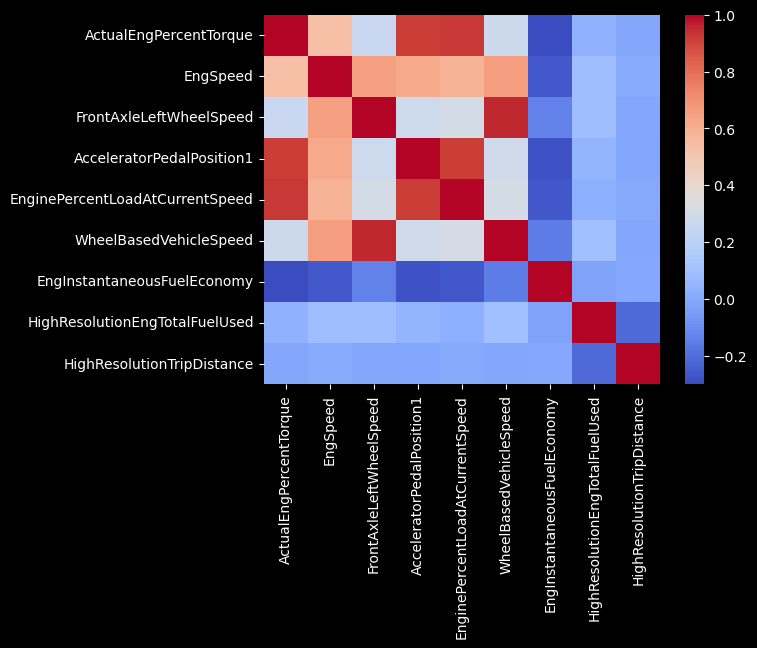

In [ ]:
sns.heatmap(labelled.corr(), cmap='coolwarm')

# Train-Test split

In [ ]:
X = labelled.drop('EngInstantaneousFuelEconomy', axis=1)
y = labelled.EngInstantaneousFuelEconomy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model

In [ ]:
model = XGBRegressor() # XGBoost does not require scaling
    
model.fit(X_train, y_train)
    
# cross validation:
MSE_metric = make_scorer(mean_squared_error)
R2_metric = make_scorer(r2_score)

validation = model_selection.cross_validate(model, X_train, y_train, cv=10, scoring=('r2', 'neg_mean_squared_error'))

Current model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 



In [ ]:
validation

#### MSE cross-validation

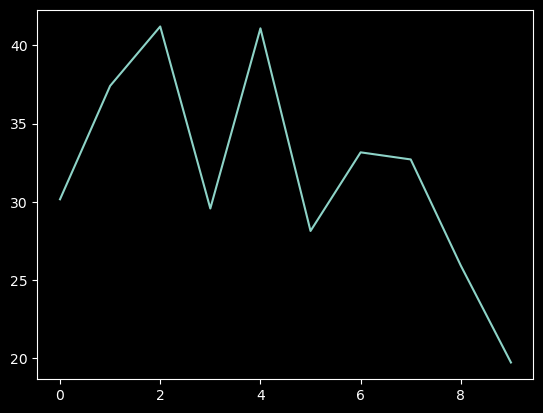

In [ ]:
plt.plot(validation['test_score'])

#### R2 cross-validation

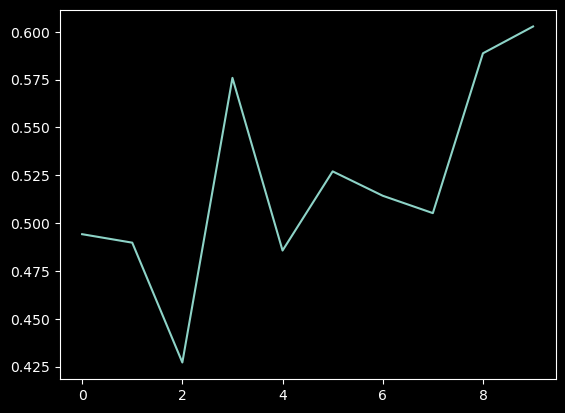

In [ ]:
plt.plot(validation['test_score'])